# Exploring the ACLED African Conflicts Dataset

## Author Information
- **Name:** [Zaur Gouliev]
- **Email:** [zaurgouliev@gmail.com]

In this dataset there are several machine learning models that can be applied to predict different things, depending on the research question and the variables of interest. Some examples of potential models are

* Predicting the likelihood of a conflict event occurring in a specific region or country based on past conflict data and other relevant variables such as socio-economic indicators, demographics, and political stability.

* Predicting the intensity of a conflict event based on the type of conflict, actors involved, location, and other relevant variables such as the number of fatalities, displacement, and destruction of infrastructure.

* Predicting the duration of a conflict event based on the same variables as above, as well as the time since the conflict started, the level of external intervention, and the success of conflict resolution efforts.

In this notebook, I do some simple exploaratory analysis of the data, my plan is to work on it down the line when I get free time in between work and university studies!

# About Dataset

## Context:
The Armed Conflict Location and Event Data Project is designed for disaggregated conflict analysis and crisis mapping. This dataset codes the dates and locations of all reported political violence and protest events in dozens of developing countries in Africa. Political violence and protest includes events that occur within civil wars and periods of instability, public protest and regime breakdown. The project covers all African countries from 1997 to the present.

## Content:
These data contain information on:

- Dates and locations of conflict events;
- Specific types of events including battles, civilian killings, riots, protests and recruitment activities;
- Events by a range of actors, including rebels, governments, militias, armed groups, protesters and civilians;
- Changes in territorial control; and
- Reported fatalities.

Event data are derived from a variety of sources including reports from developing countries and local media, humanitarian agencies, and research publications. Please review the [codebook](https://acleddata.com/wp-content/uploads/dlm_uploads/2021/01/ACLED_Codebook_2021.pdf) and [user guide](https://acleddata.com/data-export-tool-user-guide/) for additional information: the codebook is for coders and users of ACLED, whereas the brief guide for users reviews important information for downloading, reviewing and using ACLED data. A specific user guide for development and humanitarian practitioners is also available, as is a guide to our sourcing materials.

## Acknowledgements:
ACLED is directed by Prof. Clionadh Raleigh (University of Sussex). It is operated by senior research manager Andrea Carboni (University of Sussex) for Africa and Hillary Tanoff for South and South-East Asia. The data collection involves several research analysts, including Charles Vannice, James Moody, Daniel Wigmore-Shepherd, Andrea Carboni, Matt Batten-Carew, Margaux Pinaud, Roudabeh Kishi, Helen Morris, Braden Fuller, Daniel Moody and others. Please cite:

Raleigh, Clionadh, Andrew Linke, Håvard Hegre and Joakim Karlsen. 2010. Introducing ACLED-Armed Conflict Location and Event Data. Journal of Peace Research 47(5) 651-660.

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import folium
import requests
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('african_conflicts.csv', encoding='ISO-8859-1')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (21,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Print the shape of the dataframe
print("Shape of the dataframe: ", df.shape)

Shape of the dataframe:  (165808, 28)


In [4]:
# Print the data types of the columns
print("Data types of the columns: ")
print(df.dtypes)

Data types of the columns: 
ACTOR1               object
ACTOR1_ID           float64
ACTOR2               object
ACTOR2_ID           float64
ACTOR_DYAD_ID        object
ADMIN1               object
ADMIN2               object
ADMIN3               object
ALLY_ACTOR_1         object
ALLY_ACTOR_2         object
COUNTRY              object
EVENT_DATE           object
EVENT_ID_CNTY        object
EVENT_ID_NO_CNTY    float64
EVENT_TYPE           object
FATALITIES            int64
GEO_PRECISION         int64
GWNO                  int64
INTER1                int64
INTER2                int64
INTERACTION           int64
LATITUDE             object
LOCATION             object
LONGITUDE            object
NOTES                object
SOURCE               object
TIME_PRECISION        int64
YEAR                  int64
dtype: object


In [5]:
# Print the first 5 rows of the dataframe
print("First 5 rows of the dataframe: ")
print(df.head())

First 5 rows of the dataframe: 
                             ACTOR1  ACTOR1_ID  \
0  Police Forces of Algeria (1999-)        NaN   
1                 Rioters (Algeria)        NaN   
2              Protesters (Algeria)        NaN   
3                 Rioters (Algeria)        NaN   
4                 Rioters (Algeria)        NaN   

                             ACTOR2  ACTOR2_ID ACTOR_DYAD_ID      ADMIN1  \
0               Civilians (Algeria)        NaN           NaN  Tizi Ouzou   
1  Police Forces of Algeria (1999-)        NaN           NaN  Tizi Ouzou   
2                               NaN        NaN           NaN      Bejaia   
3  Police Forces of Algeria (1999-)        NaN           NaN      Bejaia   
4  Police Forces of Algeria (1999-)        NaN           NaN  Tizi Ouzou   

        ADMIN2 ADMIN3                   ALLY_ACTOR_1  \
0  Beni-Douala    NaN                            NaN   
1   Tizi Ouzou    NaN  Berber Ethnic Group (Algeria)   
2      Amizour    NaN             Students

In [6]:
# Print the last 5 rows of the dataframe
print("Last 5 rows of the dataframe: ")
print(df.tail())

Last 5 rows of the dataframe: 
                                                   ACTOR1  ACTOR1_ID  \
165803  ZANU-PF: Zimbabwe African National Union-Patri...     3929.0   
165804                  Police Forces of Zimbabwe (1987-)     3050.0   
165805  ZANU-PF: Zimbabwe African National Union-Patri...     3929.0   
165806  ZNLWVA: Zimbabwe National Liberation War Veter...     3930.0   
165807                              Protesters (Zimbabwe)     3163.0   

                      ACTOR2  ACTOR2_ID ACTOR_DYAD_ID            ADMIN1  \
165803  Civilians (Zimbabwe)      685.0      685-3929            Harare   
165804  Civilians (Zimbabwe)      685.0      685-3050  Mashonaland West   
165805  Civilians (Zimbabwe)      685.0      685-3929  Mashonaland East   
165806  Civilians (Zimbabwe)      685.0      685-3930          Masvingo   
165807                   NaN        0.0        0-3163  Mashonaland East   

          ADMIN2               ADMIN3  \
165803    Harare  Harare City Council   
165

In [7]:
# Print summary statistics for the numeric columns
print("Summary statistics for numeric columns: ")
print(df.describe())

Summary statistics for numeric columns: 
           ACTOR1_ID      ACTOR2_ID  EVENT_ID_NO_CNTY     FATALITIES  \
count  140747.000000  140747.000000     140747.000000  165808.000000   
mean     2587.796692    1211.638820      70374.000000       4.420257   
std      1030.065824    1242.978894      40630.303506      76.071441   
min         1.000000       0.000000          1.000000       0.000000   
25%      2081.000000       0.000000      35187.500000       0.000000   
50%      3043.000000     675.000000      70374.000000       0.000000   
75%      3288.000000    2229.000000     105560.500000       1.000000   
max      3960.000000    3960.000000     140747.000000   25000.000000   

       GEO_PRECISION           GWNO         INTER1         INTER2  \
count  165808.000000  165808.000000  165808.000000  165808.000000   
mean        1.261061     538.296964       3.385500       3.193603   
std         0.524248      61.974200       2.033114       2.920635   
min         1.000000     404.00000

In [8]:
# Check for missing values
print(df.isnull().sum())

ACTOR1                   0
ACTOR1_ID            25061
ACTOR2               43553
ACTOR2_ID            25061
ACTOR_DYAD_ID        25061
ADMIN1                   0
ADMIN2                 132
ADMIN3               78875
ALLY_ACTOR_1        137664
ALLY_ACTOR_2        146157
COUNTRY                  0
EVENT_DATE               0
EVENT_ID_CNTY            0
EVENT_ID_NO_CNTY     25061
EVENT_TYPE               0
FATALITIES               0
GEO_PRECISION            0
GWNO                     0
INTER1                   0
INTER2                   0
INTERACTION              0
LATITUDE                 0
LOCATION                 3
LONGITUDE                0
NOTES                10227
SOURCE                 173
TIME_PRECISION           0
YEAR                     0
dtype: int64


In [9]:
# Convert date columns to datetime with format 'dd/mm/yyyy'
df['EVENT_DATE'] = pd.to_datetime(df['EVENT_DATE'], format='%d/%m/%Y')

In [10]:
# Check for missing values
print(df.isnull().sum())

ACTOR1                   0
ACTOR1_ID            25061
ACTOR2               43553
ACTOR2_ID            25061
ACTOR_DYAD_ID        25061
ADMIN1                   0
ADMIN2                 132
ADMIN3               78875
ALLY_ACTOR_1        137664
ALLY_ACTOR_2        146157
COUNTRY                  0
EVENT_DATE               0
EVENT_ID_CNTY            0
EVENT_ID_NO_CNTY     25061
EVENT_TYPE               0
FATALITIES               0
GEO_PRECISION            0
GWNO                     0
INTER1                   0
INTER2                   0
INTERACTION              0
LATITUDE                 0
LOCATION                 3
LONGITUDE                0
NOTES                10227
SOURCE                 173
TIME_PRECISION           0
YEAR                     0
dtype: int64


In [11]:
# Replace inconsistent values in the "GEO_PRECISION" column
df['GEO_PRECISION'] = df['GEO_PRECISION'].replace({-9: np.nan})

In [12]:
text = " ".join(df['NOTES'].dropna()) # Concatenate all the text data from your dataset into a single string

In [13]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10)

In [14]:
wordcloud.generate(text)

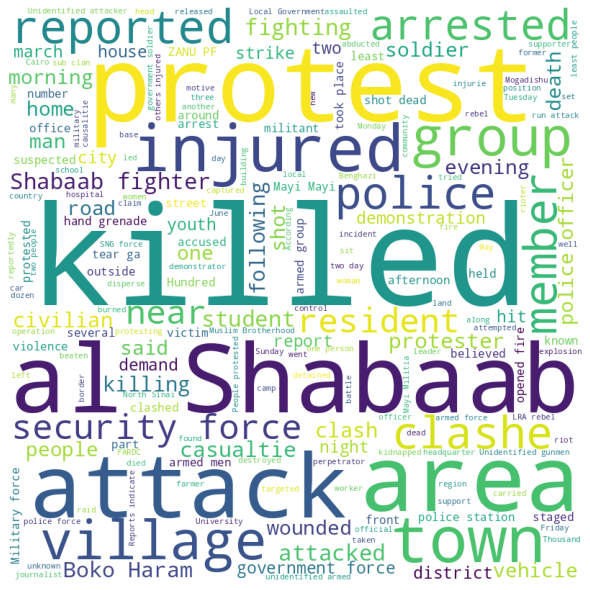

In [15]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [16]:
# convert the 'EVENT_DATE' column to datetime format
df['EVENT_DATE'] = pd.to_datetime(df['EVENT_DATE'])

In [17]:
# create a new column for the year
df['YEAR'] = df['EVENT_DATE'].dt.year

In [18]:
# group the data by year and count the number of events in each year
attacks_by_year = df.groupby('YEAR').size()

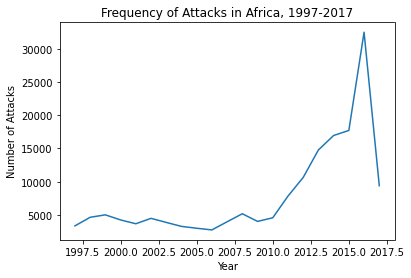

In [19]:
# create a line plot of the frequency of attacks over time
plt.plot(attacks_by_year.index, attacks_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Frequency of Attacks in Africa, 1997-2017')
plt.show()

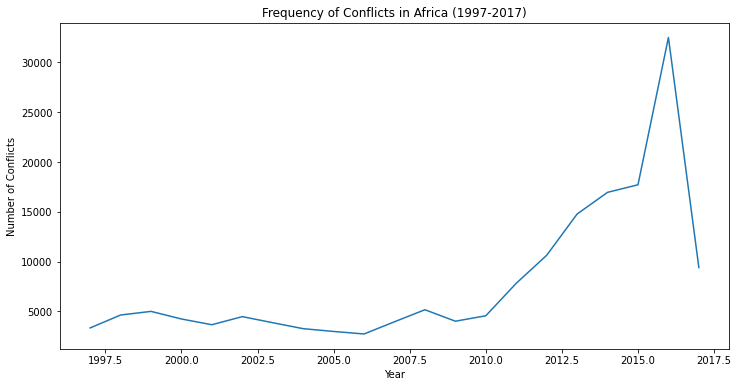

In [20]:
# Set figure size
plt.figure(figsize=(12,6))

# Create plot
ax = df.groupby(['YEAR'])['EVENT_ID_CNTY'].count().plot()

# Set x-axis label
ax.set_xlabel("Year")

# Set y-axis label
ax.set_ylabel("Number of Conflicts")

# Set title
ax.set_title("Frequency of Conflicts in Africa (1997-2017)")

# Show plot
plt.show()

In [21]:
corr = df['FATALITIES'].corr(df['YEAR'])

print("Pearson's correlation coefficient: ", corr)

Pearson's correlation coefficient:  -0.059512027638162185


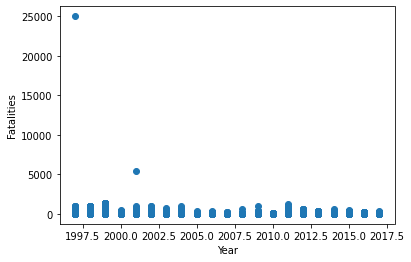

In [22]:
plt.scatter(df['YEAR'], df['FATALITIES'])
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.show()

In [23]:
# Filter the dataset to only include events in 1997 and 2001
events_97_01 = df[(df.YEAR == 1997) | (df.YEAR == 2001)]

# Display the notes column for the filtered dataset
print(events_97_01.NOTES)

0         A Berber student was shot while in police cust...
1         Riots were reported in numerous villages in Ka...
2         Students protested in the Amizour area. At lea...
3         Rioters threw molotov cocktails, rocks and bur...
4         Rioters threw molotov cocktails, rocks and bur...
                                ...                        
165640                                                  NaN
165641                                                  NaN
165710                     42 houses burned, workers beaten
165719                                                  NaN
165800                                                  NaN
Name: NOTES, Length: 7013, dtype: object


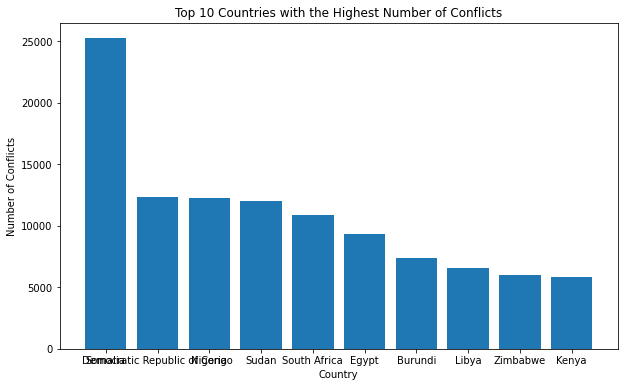

In [24]:
# Get the count of conflicts per country
country_counts = df['COUNTRY'].value_counts()

# Plot the top 10 countries with the highest number of conflicts
top_10_countries = country_counts.head(10)
plt.figure(figsize=(10,6))
plt.bar(top_10_countries.index, top_10_countries.values)
plt.title('Top 10 Countries with the Highest Number of Conflicts')
plt.xlabel('Country')
plt.ylabel('Number of Conflicts')
plt.show()

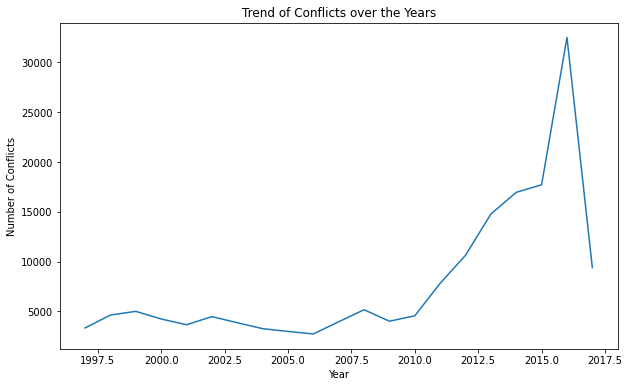

In [25]:
# Convert the "EVENT_DATE" column to datetime format
df['EVENT_DATE'] = pd.to_datetime(df['EVENT_DATE'], format='%d/%m/%Y')

# Group the dataset by year and count the number of conflicts per year
conflict_count = df.groupby(df['EVENT_DATE'].dt.year)['EVENT_ID_CNTY'].count()

# Plot the trend of conflicts over the years
plt.figure(figsize=(10,6))
plt.plot(conflict_count.index, conflict_count.values)
plt.title('Trend of Conflicts over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Conflicts')
plt.show()

In [26]:
# Extract rows where either ACTOR1 or ACTOR2 contains the word "Somalia"
somalia_conflicts = df[(df['ACTOR1'].str.contains("Somalia")) | (df['ACTOR2'].str.contains("Somalia"))]

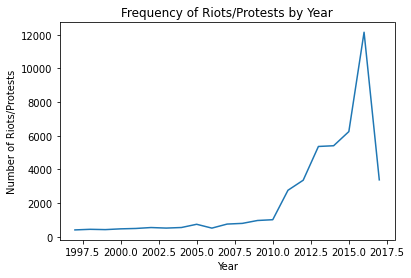

In [27]:
# Filter the dataframe to only include Riots/Protests
riots_df = df[df['EVENT_TYPE'] == 'Riots/Protests'].copy()

# Group the data by year and count the number of events
riots_year_count = riots_df.groupby(riots_df['YEAR']).size().reset_index(name='counts')

# Plot the line graph
plt.plot(riots_year_count['YEAR'], riots_year_count['counts'])
plt.title('Frequency of Riots/Protests by Year')
plt.xlabel('Year')
plt.ylabel('Number of Riots/Protests')
plt.show()

In [28]:
actor_df = df['ACTOR1'].value_counts().reset_index()
actor_df.columns = ['Actor', 'Frequency']
actor_df = actor_df.head(10)

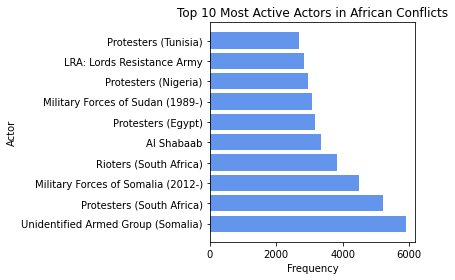

In [29]:
plt.barh(actor_df['Actor'], actor_df['Frequency'], color='cornflowerblue')
plt.xlabel('Frequency')
plt.ylabel('Actor')
plt.title('Top 10 Most Active Actors in African Conflicts')
plt.tight_layout()
plt.show()

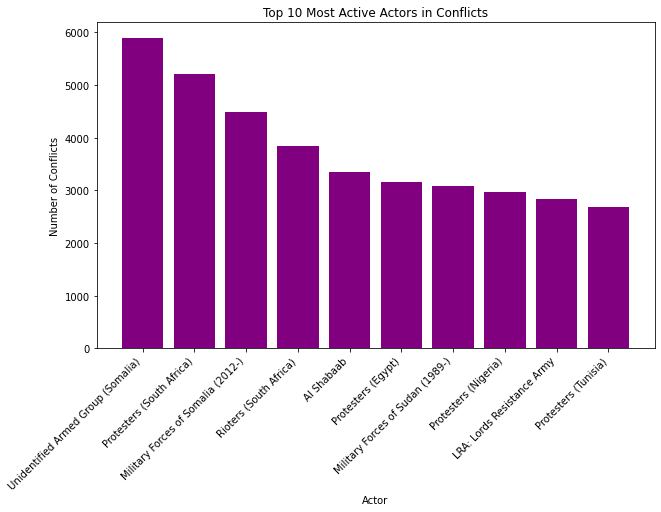

In [30]:
# Get the top 10 most active actors
top_actors = df['ACTOR1'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_actors.index, top_actors.values, color='purple')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Actor')
plt.ylabel('Number of Conflicts')
plt.title('Top 10 Most Active Actors in Conflicts')
plt.show()

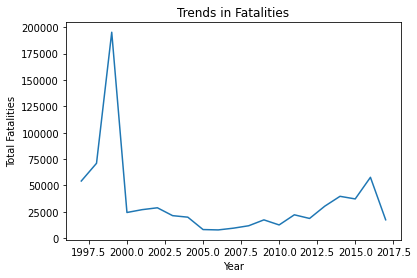

In [31]:
import matplotlib.pyplot as plt

fatalities_df = df[['YEAR', 'FATALITIES']].groupby('YEAR').sum().reset_index()

plt.plot(fatalities_df['YEAR'], fatalities_df['FATALITIES'])
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.title('Trends in Fatalities')
plt.show()

## Geographic distribution of conflicts: A heat map or a choropleth map can be created to show the number of conflicts or the intensity of conflicts in different countries or regions.

In [32]:
conflicts_by_country = df.groupby('COUNTRY').size().reset_index(name='counts')

In [33]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
response = requests.get(f'{url}/world-countries.json')
world_geojson = response.json()

m = folium.Map(location=[30, 0], zoom_start=2)
folium.GeoJson(
    world_geojson,
    name='World conflicts',
    tooltip=folium.features.GeoJsonTooltip(fields=['name'], labels=False),
    style_function=lambda x: {'fillColor': 'red', 'color': 'black', 'weight': 2, 'fillOpacity': 0.5}
).add_to(m)

m

In [34]:
m = folium.Map(location=[0, 0], zoom_start=2)
folium.Choropleth(
    geo_data=world_geojson,
    name='choropleth',
    data=conflicts_by_country,
    columns=['COUNTRY', 'counts'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Conflicts',
).add_to(m)
folium.LayerControl().add_to(m)
m

## Temporal distribution of conflicts: A line graph or a bar graph can be created to show the number of conflicts over time.

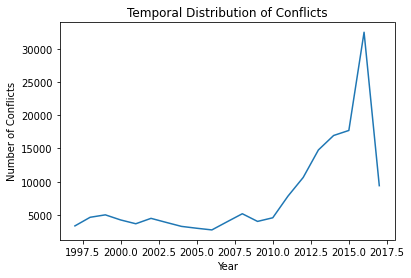

In [35]:
# Convert the 'EVENT_DATE' column to a pandas datetime format
df['EVENT_DATE'] = pd.to_datetime(df['EVENT_DATE'], errors='coerce')

# Extract the year from the 'EVENT_DATE' column and create a new 'YEAR' column
df['YEAR'] = df['EVENT_DATE'].dt.year

# Group the conflicts by year and count the number of conflicts each year
conflicts_by_year = df.groupby('YEAR').size().reset_index(name='counts')

# Create a line graph of the number of conflicts by year
plt.plot(conflicts_by_year['YEAR'], conflicts_by_year['counts'])
plt.xlabel('Year')
plt.ylabel('Number of Conflicts')
plt.title('Temporal Distribution of Conflicts')
plt.show()

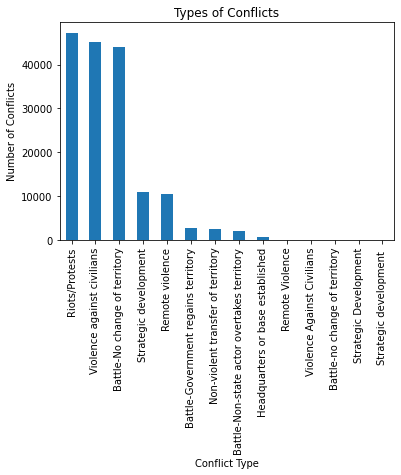

In [36]:
# Calculate counts of each conflict type
conflict_counts = df['EVENT_TYPE'].value_counts()

# Create a stacked bar chart
conflict_counts.plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('Conflict Type')
plt.ylabel('Number of Conflicts')
plt.title('Types of Conflicts')
plt.show()

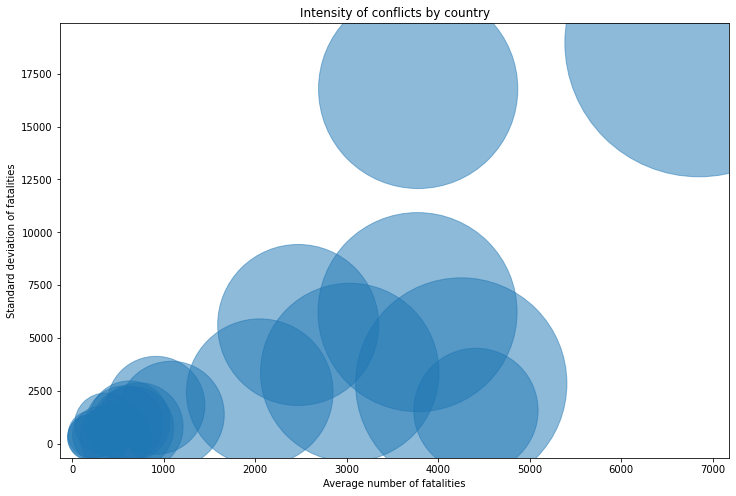

In [37]:
# Create a pivot table to get the number of fatalities by country and year
fatalities_by_country = df.pivot_table(index='COUNTRY', columns='YEAR', values='FATALITIES', aggfunc='sum')

# Get the top 20 countries with the most fatalities
top_countries = fatalities_by_country.sum(axis=1).nlargest(20)

# Filter the pivot table to only include top countries
fatalities_by_country = fatalities_by_country.loc[top_countries.index]

# Create a scatter plot to show the intensity of conflicts
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(fatalities_by_country.mean(axis=1),  # X-axis: average number of fatalities
           fatalities_by_country.std(axis=1),   # Y-axis: standard deviation of fatalities
           s=fatalities_by_country.sum(axis=1) * 0.5,  # Size of bubble: total number of fatalities
           alpha=0.5)  # Transparency of bubbles
ax.set_xlabel('Average number of fatalities')
ax.set_ylabel('Standard deviation of fatalities')
ax.set_title('Intensity of conflicts by country')
plt.show()

The above is a scatter plot with the average number of fatalities on the X-axis, the standard deviation of fatalities on the Y-axis, and the size of the bubble representing the total number of fatalities. The transparency of the bubbles is set to 0.5 to allow overlapping bubbles to be more visible. The top 20 countries with the most fatalities are included in the plot.